In [2]:
import pandas as pd
import numpy as np

In [3]:
df_flight = pd.read_csv("2005.csv")
df_flight.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


In [4]:
df_flight.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
df_flight.shape

(7140596, 29)

In [6]:
df_flight.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               133730
CRSDepTime                 0
ArrTime               147758
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime     147758
CRSElapsedTime             0
AirTime               147758
ArrDelay              147758
DepDelay              133730
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7006865
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [7]:
# Filter out unimportant columns

df_flight = df_flight[['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'ArrDelay',
 'Origin',
 'Distance',
 'Cancelled']]

df_flight.head(5)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay,Origin,Distance,Cancelled
0,2005,1,28,5,1605,-18.0,BOS,867,0
1,2005,1,29,6,1605,-23.0,BOS,867,0
2,2005,1,30,7,1610,-24.0,BOS,867,0
3,2005,1,31,1,1605,-33.0,BOS,867,0
4,2005,1,2,7,1900,3.0,ORD,867,0


In [8]:
# How much of your data is missing?
df_flight.isnull().sum().sort_values(ascending=False).head()

ArrDelay      147758
Cancelled          0
Distance           0
Origin             0
CRSDepTime         0
dtype: int64

In [9]:
#Drop rows with missing data in the important columns, i.e. the predictors for flight delay
total_data_rows = len(df_flight.index)
#Drop NaNs
df_flight.dropna(subset = ['ArrDelay'],inplace=True)
data_retained = len(df_flight.index)/total_data_rows
print('Data Retained: '+str(round(data_retained*100,2))+' %')

Data Retained: 97.93 %


In [10]:
df_flight[df_flight['Cancelled']==1].index

Int64Index([], dtype='int64')

In [11]:
df_flight[df_flight.isnull().values.any(axis=1)].head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay,Origin,Distance,Cancelled


In [12]:
df_flight.dtypes

Year            int64
Month           int64
DayofMonth      int64
DayOfWeek       int64
CRSDepTime      int64
ArrDelay      float64
Origin         object
Distance        int64
Cancelled       int64
dtype: object

In [13]:
# Take a look at the outcome variable: 'ArrDelay'
print(df_flight['ArrDelay'].value_counts())

-5.0      292070
 0.0      283299
-10.0     235429
-7.0      225394
-3.0      220454
-2.0      216765
-8.0      214936
-6.0      212279
-4.0      209213
-9.0      193428
-1.0      183856
-11.0     170390
-12.0     166077
 2.0      160722
 5.0      160566
 1.0      154705
 3.0      154320
-13.0     147920
-15.0     139371
 4.0      134734
-14.0     127929
 6.0      113437
 7.0      112767
 10.0     107037
 8.0      105923
-16.0      99594
-17.0      91642
 9.0       91145
 12.0      78751
-18.0      77558
           ...  
 656.0         1
 655.0         1
 922.0         1
 925.0         1
 650.0         1
 927.0         1
 649.0         1
 929.0         1
 931.0         1
 932.0         1
 933.0         1
 934.0         1
 648.0         1
 939.0         1
 967.0         1
 943.0         1
 645.0         1
 946.0         1
 947.0         1
 948.0         1
 950.0         1
 954.0         1
 955.0         1
 644.0         1
 960.0         1
 961.0         1
 962.0         1
 964.0        

In [14]:
# Assign outcome as 0 if ArrDelay <=10 or null and as 1 if ArrDelay >10
df_flight['ArrDelay'] = [1 if x >= 10 else 0 for x in df_flight['ArrDelay']]

In [15]:
# Take a look at the outcome variable: 'ArrDelay'
print(df_flight['ArrDelay'].value_counts())
# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df_flight.drop('ArrDelay', 1)
y = df_flight.ArrDelay

0    5117935
1    1874903
Name: ArrDelay, dtype: int64


In [16]:
print(X.head(5))

   Year  Month  DayofMonth  DayOfWeek  CRSDepTime Origin  Distance  Cancelled
0  2005      1          28          5        1605    BOS       867          0
1  2005      1          29          6        1605    BOS       867          0
2  2005      1          30          7        1610    BOS       867          0
3  2005      1          31          1        1605    BOS       867          0
4  2005      1           2          7        1900    ORD       867          0


In [17]:
print(y.head(5))

0    0
1    0
2    0
3    0
4    0
Name: ArrDelay, dtype: int64


In [18]:
# Take a look at the outcome variable: 'Origin'
print(X['Origin'].value_counts())

ATL    419051
ORD    328577
DFW    302956
LAX    228122
IAH    208161
CVG    203689
DEN    180536
PHX    172807
LAS    165834
SLC    158492
EWR    150696
MSP    135279
DTW    133389
SFO    127055
BOS    123541
PHL    122935
LGA    122196
IAD    119708
MCO    117604
CLT    112599
SEA    105385
BWI    105229
DCA    101890
JFK     99793
MDW     92132
SAN     88012
CLE     87830
TPA     78537
OAK     69652
FLL     68767
        ...  
CDV       712
YAK       705
WRG       696
PSG       691
ISO       674
LWS       659
BRW       639
ADQ       617
TUP       583
HKY       583
DRO       536
VCT       499
STX       466
PIE       466
VIS       417
AKN       371
SCC       318
SPI       285
WYS       261
GUC       229
DLG       226
ACK       200
PSE       195
LWB       176
CWA       174
ADK        94
GST        86
CYS         1
OGD         1
CKB         1
Name: Origin, Length: 285, dtype: int64


In [19]:
# In this case, bucket low frequecy categories as "Other"
X['Origin'] = [1 if x == 'ATL' else 2 if x == 'ORD' else 3 if x == 'DFW' else 4 if x == 'LAX' 
               else 5 if x == 'CVG' else 6 for x in X['Origin']]

print(X['Origin'].value_counts().sort_values(ascending=False))


6    5510443
1     419051
2     328577
3     302956
4     228122
5     203689
Name: Origin, dtype: int64


In [20]:
# Function to dummy all the categorical variables used for modeling
# def dummy_df(df, todummy_list):
#     for x in todummy_list:
#         dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
#         df = df.drop(x, 1)
#         df = pd.concat([df, dummies], axis=1)
#     return df

In [21]:
# # Create a list of features to dummy and apply the function
# todummy_list = ['Origin']
# X = dummy_df(X, todummy_list)
# print(X.head(5))

In [22]:
# Use pyplot in matplotlib to plot histograms
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

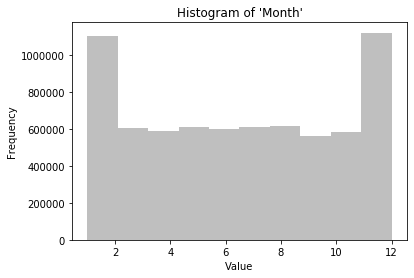

In [23]:
plot_histogram(X['Month'])

In [24]:
# Plot histograms to show distribution of features by outcome categories
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Outcome=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='Outcome=1')
    plt.title("Histogram of '{var_name}' by Outcome Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

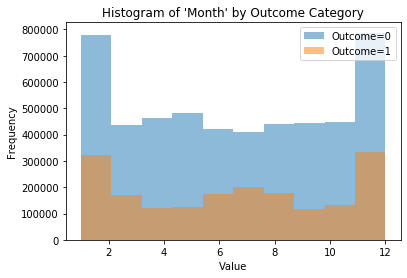

In [25]:
plot_histogram_dv(X['Month'], y)

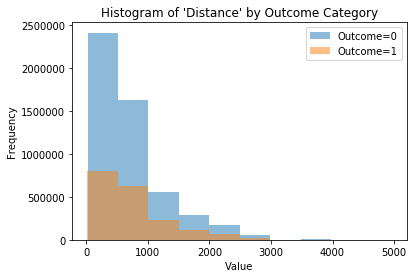

In [26]:
plot_histogram_dv(X['Distance'], y)

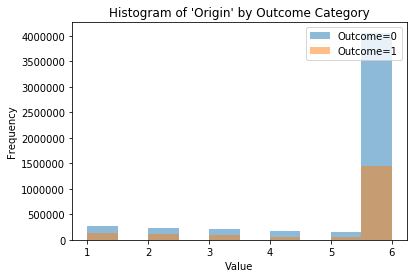

In [27]:
plot_histogram_dv(X['Origin'], y)

In [28]:
# Use train_test_split in sklearn.model_selection to split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1)

In [29]:
# The total number of features are checked after preprocessing
print(df_flight.shape)
print(X.shape)

(6992838, 9)
(6992838, 8)


In [30]:
# Init the Gaussian Classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [31]:
# Train the model
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
# Predict Output 
pred = model.predict(X_test)
print(pred[:5])

[0 0 0 0 0]


Text(89.18, 0.5, 'Predicted')

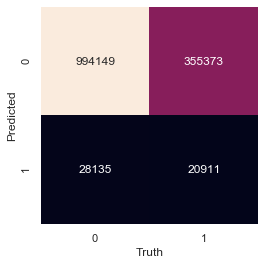

In [33]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(pred, y_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')